<a href="https://colab.research.google.com/github/prithvi-diwanji/NLP2024_exercises/blob/main/assigment3_prithvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part a
1. Use following sentences to find the tf*idf vectorized data.
1. The postman delivered the package to the wrong address.
2. I wrapped a beautiful present for my friend's birthday.
3. The delivery truck arrived late due to heavy traffic.
4. We need to check the shipping address before sending the order.
5. Online shopping offers a wide variety of products with fast delivery.

# Make df using the sentences

In [6]:
sent1 = 'The postman delivered the package to the wrong address.'
sent2 = 'I wrapped a beautiful present for my friend\'s birthday.'
sent3 = 'We need to check the shipping address before sending the order.'
sent4 = 'Online shopping offers a wide variety of products with fast delivery.'

In [7]:
import pandas as pd

In [8]:
list_values = [sent1, sent2, sent3, sent4]

In [9]:
df = pd.DataFrame(list_values)
print(df)

                                                   0
0  The postman delivered the package to the wrong...
1  I wrapped a beautiful present for my friend's ...
2  We need to check the shipping address before s...
3  Online shopping offers a wide variety of produ...


In [24]:
column_names=["Sent"]
df.columns = column_names

# clean the data



In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [18]:
!pip install nltk
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
# define a function for text cleaning
# define a function for text cleaning
import nltk
nltk.download('stopwords')
swords = stopwords.words('english')
from nltk.stem import PorterStemmer # Import the PorterStemmer
ps = PorterStemmer() # Initialize the PorterStemmer object



def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:

# Iterate over each sentence in the Series and clean it
cleaned_texts = []
for sentence in df['Sent']:
    cleaned_texts.append(clean_text(sentence))

print(cleaned_texts)

[['postman', 'deliv', 'packag', 'wrong', 'address'], ['wrap', 'beauti', 'present', 'friend', 'birthday'], ['need', 'check', 'ship', 'address', 'send', 'order'], ['onlin', 'shop', 'offer', 'wide', 'varieti', 'product', 'fast', 'deliveri']]




# TFIDF

In [49]:
# import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
# create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [51]:
# perform the operation
features_new = tfidf.fit_transform(df['Sent'])

In [52]:
features_new.shape

(4, 23)

# Features

In [53]:
features_new

<4x23 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [54]:
print(tfidf.get_feature_names_out())

['address' 'beauti' 'birthday' 'check' 'deliv' 'deliveri' 'fast' 'friend'
 'need' 'offer' 'onlin' 'order' 'packag' 'postman' 'present' 'product'
 'send' 'ship' 'shop' 'varieti' 'wide' 'wrap' 'wrong']


In [55]:
# print the full sparse matrix
print(features_new.toarray())

[[0.36673901 0.         0.         0.         0.46516193 0.
  0.         0.         0.         0.         0.         0.
  0.46516193 0.46516193 0.         0.         0.         0.
  0.         0.         0.         0.         0.46516193]
 [0.         0.4472136  0.4472136  0.         0.         0.
  0.         0.4472136  0.         0.         0.         0.
  0.         0.         0.4472136  0.         0.         0.
  0.         0.         0.         0.4472136  0.        ]
 [0.3325242  0.         0.         0.42176478 0.         0.
  0.         0.         0.42176478 0.         0.         0.42176478
  0.         0.         0.         0.         0.42176478 0.42176478
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.35355339
  0.35355339 0.         0.         0.35355339 0.35355339 0.
  0.         0.         0.         0.35355339 0.         0.
  0.35355339 0.35355339 0.35355339 0.         0.        ]]


In [57]:
pd.DataFrame(features_new.toarray(), columns = tfidf.get_feature_names_out())

,address,beauti,birthday,check,deliv,deliveri,fast,friend,need,offer,...,postman,present,product,send,ship,shop,varieti,wide,wrap,wrong
0,0.366739,0.000000,0.000000,0.000000,0.465162,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.465162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465162
1,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,...,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000
2,0.332524,0.000000,0.000000,0.421765,0.000000,0.000000,0.000000,0.000000,0.421765,0.000000,...,0.000000,0.000000,0.000000,0.421765,0.421765,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.353553,0.000000,0.000000,0.353553,...,0.000000,0.000000,0.353553,0.000000,0.000000,0.353553,0.353553,0.353553,0.000000,0.000000


# part 2

Download the file spam_messages.csv from the link below:
https://mitu.co.in/dataset
This file contains the collection of spam and not spam (ham) messages received in
the mail box.
Perform the following operations on it:
1. Read the file
2. Seperate input and output data
3. Explore the output data
4. Prepare and vectorize the data
5. Cross validate the data
6. Build the Decision Tree model for classification
7. Evaluate the performance of algorithm
8. Download the file sample.csv which contains the unknown mails. Predict the
category of these mails.

save the dataset file and read it

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('spam_messages.csv')

In [60]:
df.shape

(5572, 2)

In [61]:
df.columns

Index(['Category', 'Message'], dtype='object')

Separate the input and output data

In [64]:
features = df['Message']  # input data
label = df['Category']    # output data

In [66]:
features.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [68]:
label

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object



```

```

# Explore the data

In [69]:
set(label)

{'ham', 'spam'}

<Axes: xlabel='Category', ylabel='count'>

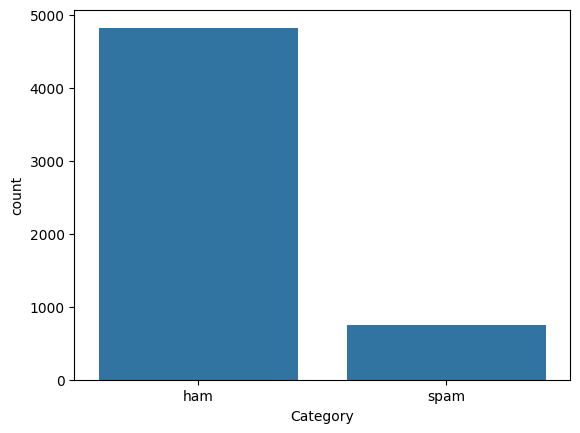

In [70]:
sns.countplot(x = label)

In [71]:
label.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

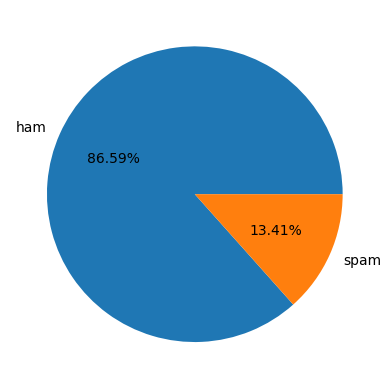

In [75]:
plt.pie(label.value_counts(), labels=label.value_counts().index, autopct='%2.2f%%');

# Prepare and vectorize the data

In [76]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [77]:
# define a function for text cleaning
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4



```

```

# TF IDF Vectorization

In [85]:
# import the class
from sklearn.feature_extraction.text import TfidfVectorizer
# create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [86]:
# perform the operation
features_new = tfidf.fit_transform(features)

In [87]:
features_new.shape

(5572, 5926)

In [88]:
len(tfidf.get_feature_names_out())

5926

# cross validation

In [89]:
# import the function
from sklearn.model_selection import train_test_split

In [90]:
# perform the cross-validation
x_train, x_test, y_train, y_test = train_test_split(features_new, label, random_state=0)

In [91]:
x_train.shape

(4179, 5926)

In [92]:
x_test.shape

(1393, 5926)

In [93]:
y_train.shape

(4179,)

In [94]:
y_test.shape

(1393,)

In [95]:
x_train[100]

<1x5926 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [97]:
y_train[100]

'ham'

# Build the Decision Tree Algorithm model on the training data

In [98]:
# import the class
from sklearn.tree import DecisionTreeClassifier

In [99]:
# create the object
dt = DecisionTreeClassifier(random_state=0)

In [100]:
# train the algorithm
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [101]:
from sklearn.tree import plot_tree

In [104]:
#plt.figure(figsize=(12,8))
#plot_tree(dt, fontsize=7);

In [105]:
tfidf.get_feature_names_out()[999]

'comb'

# Performance Evaluation

In [106]:
# predict the result on test data
y_pred = dt.predict(x_test)

In [107]:
# algorithm predicted data
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [108]:
len(y_pred)

1393

In [109]:
y_test

4456     ham
690     spam
944      ham
3768     ham
1189     ham
        ... 
1889     ham
2250    spam
2915    spam
1282     ham
1206     ham
Name: Category, Length: 1393, dtype: object

In [110]:
# import the class
from sklearn.metrics import ConfusionMatrixDisplay

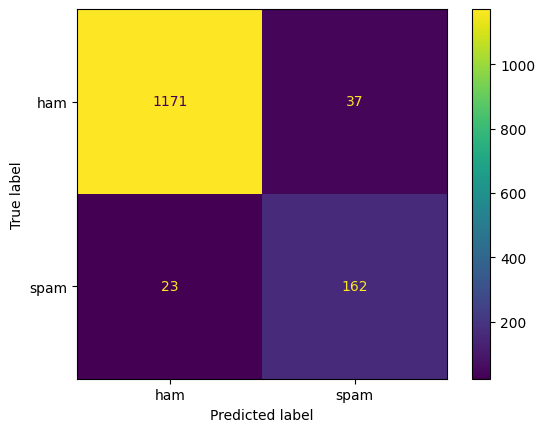

In [111]:
# show the matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

# Prediction on new file data

In [113]:
f = open('sample.csv', encoding='utf-8')

In [114]:
sample = f.readlines()

In [115]:
sample

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [116]:
tfidf.transform(sample)

<3x5926 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [117]:
dt.predict(tfidf.transform(sample)) #prediction on new data!!

array(['ham', 'spam', 'ham'], dtype=object)

In [118]:
len(sample)

3